# Phase 1 - Milestone 1
    Name        : Pratama Waskito Prihandana
    class       : batch 003

# I. Introduction
______

# II. Importing Library
____

In [1]:
# fundamental
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import scipy
import sklearn
import seaborn as sns

# correlation finder
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

# preprocessing data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# model evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer,precision_recall_curve,auc,f1_score

# Model algorithm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

# hyperparameter tuning
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hype
from scipy.stats import expon
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold


# III. Load Data
_____

The data source is taken from BigQuery from the dataset 'ml_datasets' and the database 'credit_card_default'.  
The syntax as below :
```
select
  limit_balance, 
  cast (sex as int) as sex, 
  cast (education_level as int) as education_level,
  cast (marital_status as int) as marital_status,
  age, 
  pay_0, 
  pay_2, 
  pay_3, 
  pay_4, 
  cast (pay_5 as float64) as pay_5,
  cast (pay_6 as float64) as pay_6, 
  bill_amt_1, 
  bill_amt_2, 
  bill_amt_3, 
  bill_amt_4, 
  bill_amt_5, 
  bill_amt_6, 
  pay_amt_1, 
  pay_amt_2, 
  pay_amt_3, 
  pay_amt_4, 
  pay_amt_5, 
  pay_amt_6, 
  cast (default_payment_next_month as int) as default_payment_next_month

from `bigquery-public-data.ml_datasets.credit_card_default`

In [2]:
# to display all column
pd.set_option('display.max_columns', None)

# define the dataset
df = pd.read_csv('h8dsft_P1M1_pratama.csv')

In [3]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,0.0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [4]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,178.0,1860.0,940.0,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,2650.0,0.0,855.0,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,886.0,0.0,930.0,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2964,100000.0,2,1,2,30.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,430.0,35993.0,2772.0,0.0,0.0,0.0,35993.0,2772.0,0.0,0.0,0.0,0.0,0


In [5]:
# rename column
df = df.rename(columns={'default_payment_next_month': 'default_payment'})

### Data size information

In [6]:
# data type info
df.dtypes

limit_balance      float64
sex                  int64
education_level      int64
marital_status       int64
age                float64
pay_0              float64
pay_2              float64
pay_3              float64
pay_4              float64
pay_5              float64
pay_6              float64
bill_amt_1         float64
bill_amt_2         float64
bill_amt_3         float64
bill_amt_4         float64
bill_amt_5         float64
bill_amt_6         float64
pay_amt_1          float64
pay_amt_2          float64
pay_amt_3          float64
pay_amt_4          float64
pay_amt_5          float64
pay_amt_6          float64
default_payment      int64
dtype: object

In [7]:
df.nunique()

limit_balance        59
sex                   2
education_level       7
marital_status        4
age                  49
pay_0                11
pay_2                10
pay_3                 9
pay_4                10
pay_5                 9
pay_6                 8
bill_amt_1         2643
bill_amt_2         2592
bill_amt_3         2549
bill_amt_4         2504
bill_amt_5         2482
bill_amt_6         2461
pay_amt_1          1415
pay_amt_2          1372
pay_amt_3          1302
pay_amt_4          1214
pay_amt_5          1194
pay_amt_6          1189
default_payment       2
dtype: int64

In [8]:
# descriptive statistic
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


In [9]:
# Categorical
cat_variables = [col for col in df.columns if df[col].nunique() <= 12]

# numerical
num_variables = [col for col in df.columns if df[col].nunique() > 12]

The assumption of splitting the data between categorical and numerical is that based on numerical variable; discrette or contiuous.  

The discrette numerical data is that the max of nunique is same or less than 12 such as sex, education, marrital status, and payment date.  

The continuous numerical data is that the max of nunique can contains more than 12, which means can be infinite such sum of money or payment amount.

Why 12? The max of discrette numerical data is based on the max month.

In [10]:
# Column numerical as discrette or categorical number
df[cat_variables].head()

,sex,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0


In [11]:
# Numerical column
df[num_variables].head()

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,130000.0,45.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
1,230000.0,41.0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0
2,200000.0,58.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0
3,500000.0,39.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0
4,230000.0,48.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0


In [12]:
# unique value in categorical columns

for i in df[cat_variables]:
    print(i, ': ' )
    print(df[cat_variables][i].value_counts())
    print('_' * 60)

sex : 
2    1802
1    1163
Name: sex, dtype: int64
____________________________________________________________
education_level : 
2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64
____________________________________________________________
marital_status : 
2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64
____________________________________________________________
pay_0 : 
 0.0    1516
-1.0     540
 1.0     356
 2.0     262
-2.0     247
 3.0      29
 4.0       7
 8.0       3
 5.0       2
 7.0       2
 6.0       1
Name: pay_0, dtype: int64
____________________________________________________________
pay_2 : 
 0.0    1607
-1.0     580
 2.0     374
-2.0     353
 3.0      32
 4.0       8
 1.0       4
 7.0       3
 5.0       2
 6.0       2
Name: pay_2, dtype: int64
____________________________________________________________
pay_3 : 
 0.0    1610
-1.0     580
 2.0     368
-2.0     367
 3.0      22
 4.0     

# IV. Exploratory Data Analysis (EDA)

The dataset contains all numerical as we have seen above, but some features are considered as discrette numerical because the number are limited the the various of variable such as sex, marital status, education level, and default payment. Each number represents single variable of features.


### Check data target

0    2330
1     635
Name: default_payment, dtype: int64

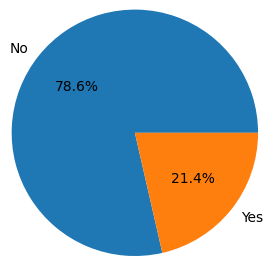

In [13]:
# default count
plt.figure(figsize=(2,2))
def_count = df['default_payment'].value_counts()
plt.pie(def_count,labels=['No','Yes'],autopct='%0.1f%%',radius=2)
df['default_payment'].value_counts()

The data target is imbalance. As we can see, the comparison between default yes and no is quite big gap. When a dataset has an imbalance target, it means that the classes within the target variable are not represent equally.

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_4544\707199697.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['limit_balance'])


count      2965.000000
mean     163369.308600
std      125030.415472
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      230000.000000
max      800000.000000
Name: limit_balance, dtype: float64

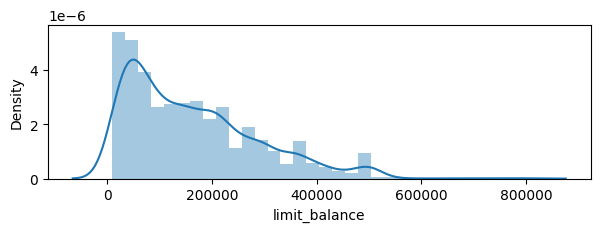

In [14]:
# limit balance data distribution

plt.figure(figsize=(7,2))
sns.distplot(df['limit_balance'])
df['limit_balance'].describe()

```Insight :```  
The credit card limit provided is right skewed since the bank doesn't provide higher credit limit to all their customers.

### Finding correlation  using PhiK matrix

In [15]:
# correlation value with PhiK according to income_bracket
phik_value = df.phik_matrix().default_payment
phik_value.sort_values(ascending=False)

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment']


default_payment    1.000000
pay_0              0.596406
pay_2              0.468383
pay_6              0.386629
pay_3              0.334766
pay_4              0.318731
pay_5              0.315456
limit_balance      0.192077
bill_amt_4         0.087574
education_level    0.085531
pay_amt_3          0.083711
bill_amt_1         0.073960
bill_amt_3         0.073115
age                0.067160
bill_amt_2         0.064060
pay_amt_4          0.062550
pay_amt_1          0.046820
pay_amt_5          0.022215
bill_amt_5         0.020120
marital_status     0.019423
sex                0.015748
pay_amt_2          0.004951
bill_amt_6         0.000000
pay_amt_6          0.000000
Name: default_payment, dtype: float64

### Feature selection

The column that has correlation to the target is pay_0 to pay_6 and limit_balance. We will set the threshold 0,1 for the column that still has correlation. The rest of them we will drop since they are below 0,1, it means they almost impact nothing to the correlation.  

We will set new dataframe according to the column that has correlation value to the target :

In [16]:
df2 = df[list(df[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'limit_balance', 'default_payment']])]

In [17]:
df2

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,default_payment
0,0.0,0.0,0.0,0.0,0.0,0.0,130000.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,230000.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,200000.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,230000.0,0
...,...,...,...,...,...,...,...,...
2960,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,30000.0,1
2961,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,20000.0,0
2962,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,280000.0,0
2963,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,360000.0,0


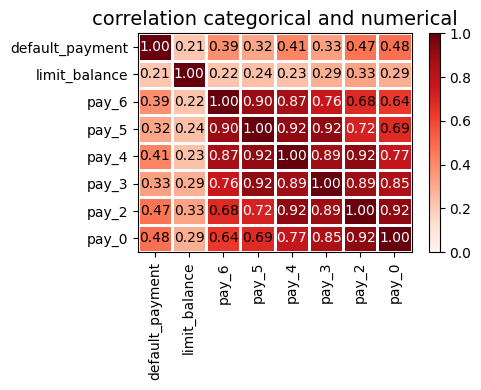

In [168]:
phik_corr = df2.phik_matrix(interval_cols='default_payment')

plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map="Reds", 
                        title=r"correlation categorical and numerical", 
                        figsize=(5,4))
plt.show()

The features are highly correlated to one another as the heatmap depicts.

### Payment due date according to default payment

<Figure size 400x300 with 0 Axes>

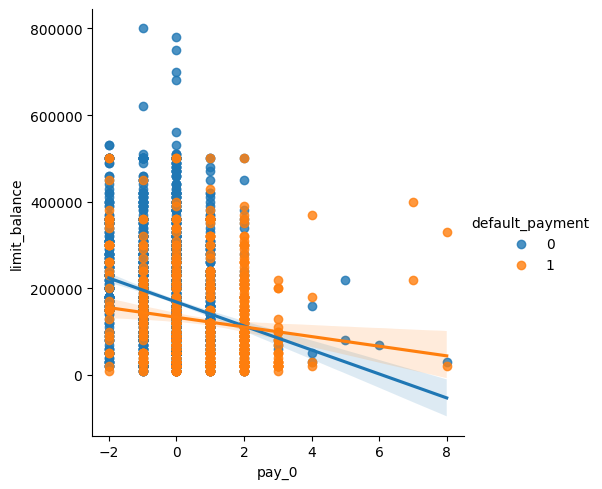

In [19]:
# pay_0
plt.figure(figsize=(4,3))
sns.lmplot(x='pay_0', y='limit_balance', hue='default_payment', data=df2, fit_reg=True)

<Figure size 600x300 with 0 Axes>

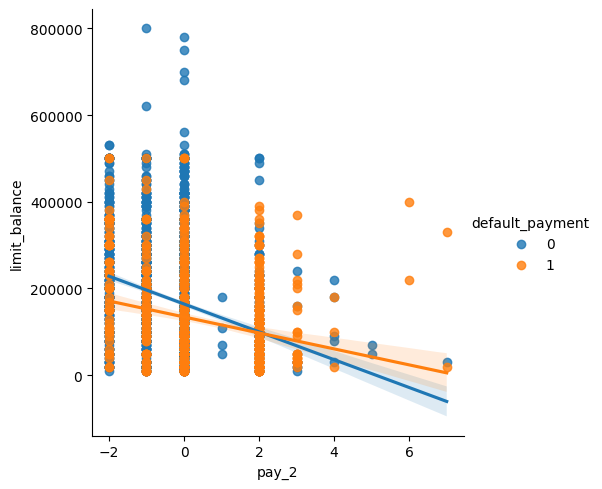

In [169]:
# pay_2
plt.figure(figsize=(6,3))
sns.lmplot(x='pay_2', y='limit_balance', hue='default_payment', data=df2, fit_reg=True, aspect=1)

<Figure size 600x300 with 0 Axes>

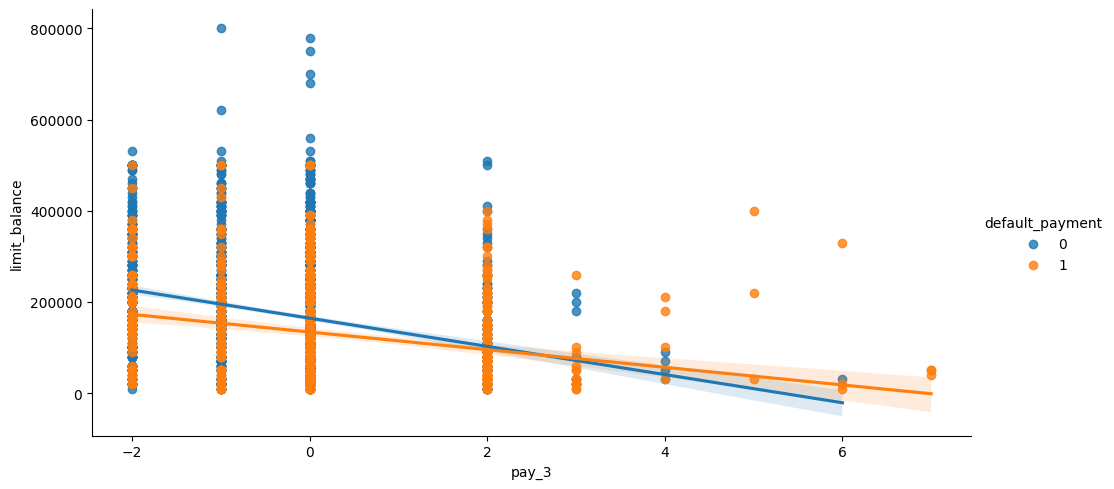

In [170]:
# pay_3
plt.figure(figsize=(6,3))
sns.lmplot(x='pay_3', y='limit_balance', hue='default_payment', data=df2, fit_reg=True, aspect=2)

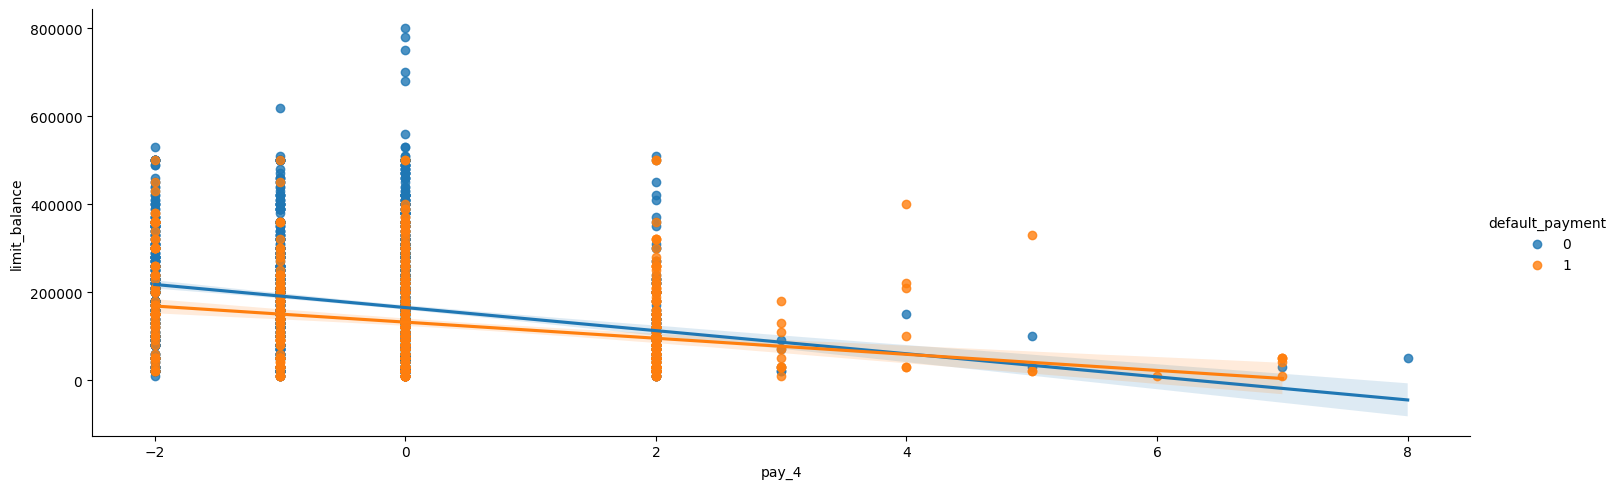

In [22]:
# pay_4
sns.lmplot(x='pay_4', y='limit_balance', hue='default_payment', data=df2, fit_reg=True, aspect=3)

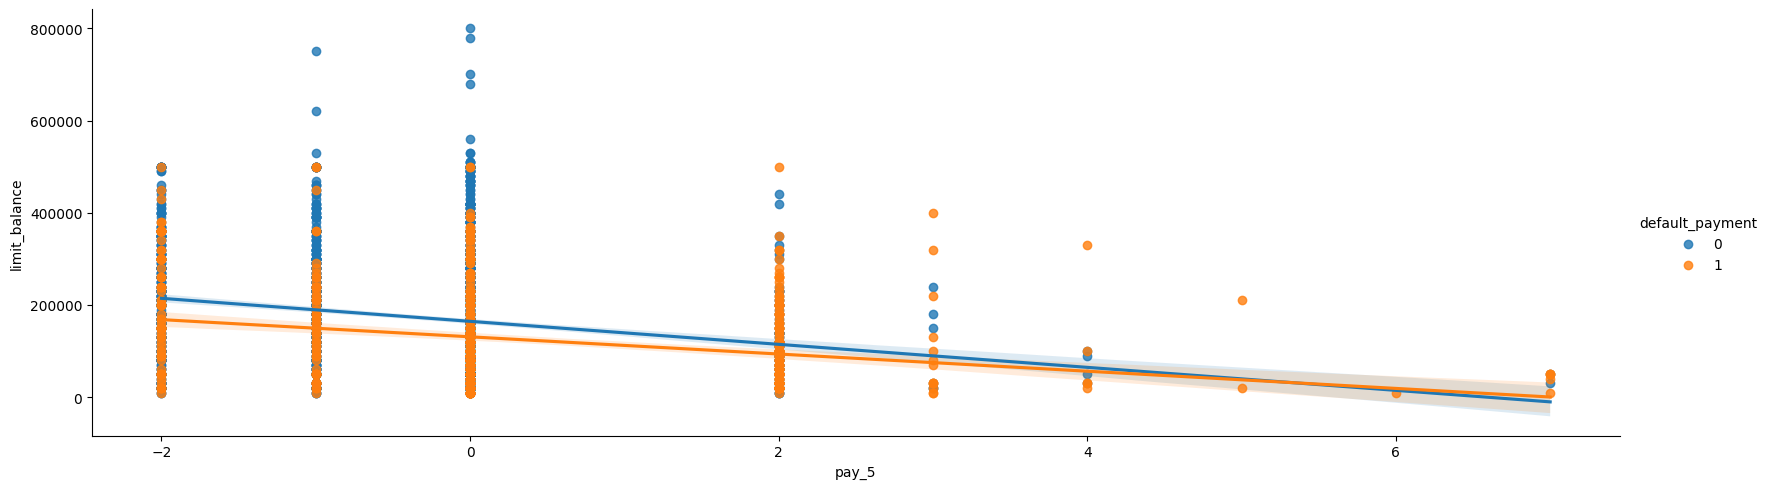

In [23]:
# pay_5
sns.lmplot(x='pay_5', y='limit_balance', hue='default_payment', data=df2, fit_reg=True, aspect=3.3)

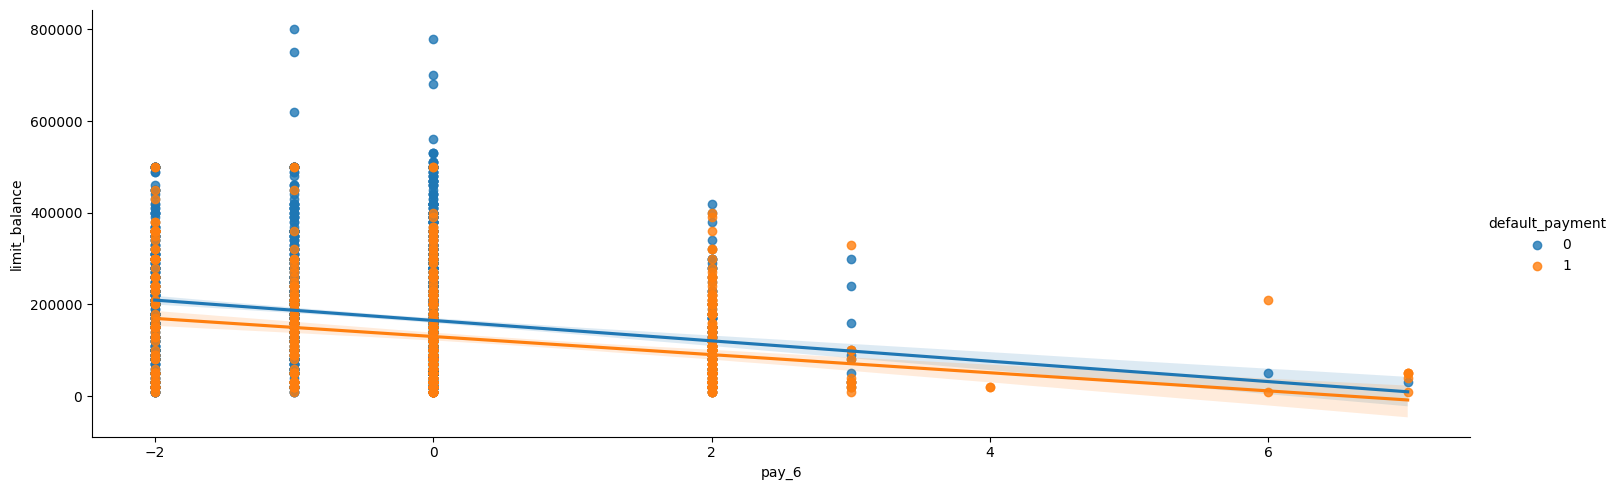

In [24]:
# pay_6
sns.lmplot(x='pay_6', y='limit_balance', hue='default_payment', data=df2, fit_reg=True, aspect=3)

```Insight :```  

In all payment column, the customer with payment duly which is below 0 x-axis has bigger chance to gain the limit balance credit card and get smaller the limit balance according to the payment delay. It means the bank decrease the use of credit card along the payment delay, because the bank will take a bigger risk on the customer with payment delay, they limit the balance almost near zero.

### Check outlier

skewness : 1.0
Percentage of outliers: 0.24%


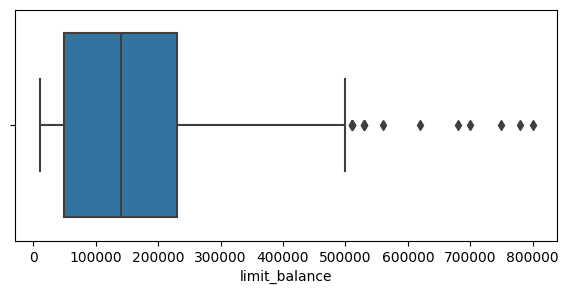

In [25]:
# Numerical outlier
from scipy import stats

plt.figure(figsize=(7,3))
sns.boxplot(data=df2, x='limit_balance')
print('skewness :', df2['limit_balance'].skew().round(2))

# z-score method for outlier detection
z = np.abs(stats.zscore(df['limit_balance']))
outliers = len(df['limit_balance'][z > 3])

# calculate the percentage of outliers
percent_outliers = (outliers / len(df['limit_balance'])) * 100
print(f"Percentage of outliers: {percent_outliers:.2f}%")

```Disclaimer```  
Outliers in financial data can represent large transaction or fraudulent activities, which are importrant to detect. Removing these outliers can lead to loss of importrant information and negatively impact to a model's ability in detecting fraud activities or it lead to a false prediction.  
``So, keep these outliers in their place and we will not touch it, just observe``.

# V. Data Pre-Processing

In [26]:
df2

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,default_payment
0,0.0,0.0,0.0,0.0,0.0,0.0,130000.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,230000.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,200000.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,230000.0,0
...,...,...,...,...,...,...,...,...
2960,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,30000.0,1
2961,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,20000.0,0
2962,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,280000.0,0
2963,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,360000.0,0


In [27]:
# assign dataset for train and test
data_train_test = df2

# split dataset into feature (x) and target (y)
x = data_train_test.drop('default_payment', axis=1)
y = data_train_test['default_payment']

# split data to train-set and test-set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=15)

# scaling method
minmax = MinMaxScaler()

# scaling numerical only
x_train_num_scaled = pd.DataFrame(minmax.fit_transform(x_train[['limit_balance']]), columns=x_train[['limit_balance']].columns.tolist())
x_test_num_scaled = pd.DataFrame(minmax.transform(x_test[['limit_balance']]), columns=x_test[['limit_balance']].columns.tolist())

# drop numerical from categorical
x_train_drop = x_train.drop('limit_balance', axis=1)
x_test_drop = x_test.drop('limit_balance', axis=1)

# Conccatenate scaled numerical and unencoded categorical
x_train_final = pd.DataFrame((np.concatenate([x_train_drop, x_train_num_scaled], axis=1)), columns=x_train.columns.tolist())
x_test_final = pd.DataFrame((np.concatenate([x_test_drop, x_test_num_scaled], axis=1)), columns=x_test.columns.tolist())

In [28]:
x_train_final.head()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.240506
1,0.0,0.0,0.0,0.0,0.0,0.0,0.569620
2,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.443038
3,0.0,0.0,0.0,0.0,0.0,0.0,0.240506
4,-1.0,2.0,2.0,2.0,0.0,0.0,0.012658


In [29]:
x_test_final.head()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance
0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.253165
1,0.0,0.0,0.0,0.0,0.0,0.0,0.025316
2,0.0,0.0,0.0,0.0,0.0,0.0,0.177215
3,0.0,0.0,0.0,0.0,0.0,0.0,0.139241
4,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.518987


# VI. Machine Learning Model

### Support Vector Machine

In [100]:

# finding parameter

param_svm = {'C': scipy.stats.expon(scale=100),
             'gamma': scipy.stats.expon(scale=.1),
             'kernel': ['rbf', 'sigmoid'],
             'class_weight':['balanced', None]}

# initiate model
svm_hyp = SVC()

# cross-validation & stratified k-fold
skf_svm = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(2,1000))

# initiate the randomized search cv
svm_cv = RandomizedSearchCV(svm_hyp, param_distributions=param_svm, cv=skf_svm, random_state=11)

# fit to data
svm_cv.fit(x_train_final, y_train)

# Print the tuned parameters and score
print("Tuned Support Vector Machine Parameters: {}".format(svm_cv.best_params_))


Tuned Support Vector Machine Parameters: {'C': 11.840211323936508, 'class_weight': None, 'gamma': 0.016859012554710374, 'kernel': 'rbf'}


In [101]:

# train-set
svm_train_test= SVC(C=11.840211323936508,
                gamma=0.016859012554710374,
                kernel='rbf',
                class_weight=None)

svm_train_test.fit(x_train_final, y_train)

#train-set
y_pred_svm_train = svm_train_test.predict(x_train_final)
print('Support Vector Machine classification report train-set :')
print(classification_report(y_train, y_pred_svm_train))

print('_'*60)

# test-set
y_pred_svm_test = svm_train_test.predict(x_test_final)
print('Support Vector Machine classification report train-set :')
print(classification_report(y_test, y_pred_svm_test))

#cross validation score
print('cross validation score :', (cross_val_score(svm_train_test.fit(x_train_final, y_train), x_test_final, y_test, cv=skf_svm)).mean().round(2)*100, '%')

Support Vector Machine classification report train-set :
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1869
           1       0.73      0.36      0.48       503

    accuracy                           0.84      2372
   macro avg       0.79      0.66      0.69      2372
weighted avg       0.82      0.84      0.81      2372

____________________________________________________________
Support Vector Machine classification report train-set :
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       461
           1       0.77      0.41      0.53       132

    accuracy                           0.84       593
   macro avg       0.81      0.69      0.72       593
weighted avg       0.83      0.84      0.82       593

cross validation score : 85.0 %


### Decision Tree

In [102]:

# Finding parameter

param_dt = {"max_depth": np.arange(1,10),
            'max_features': np.arange(1,10),
            'min_samples_leaf': np.arange(1,10),
            'criterion': ["gini", "entropy"]}

# initiate model
dt_hyp = DecisionTreeClassifier()

# cross-validation & stratified k-fold
skf_dt = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(2,1000))

# initiate the randomized search cv
dt_cv = RandomizedSearchCV(dt_hyp, param_distributions=param_dt, cv=skf_dt, random_state=np.random.randint(1,1000))

# fit to data
dt_cv.fit(x_train_final, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dt_cv.best_params_))


Tuned Decision Tree Parameters: {'min_samples_leaf': 4, 'max_features': 8, 'max_depth': 1, 'criterion': 'gini'}


In [128]:

# train-set
dt_train_test = DecisionTreeClassifier(max_depth=1,
                            max_features=8,
                            min_samples_leaf=4,
                            criterion='gini')

dt_train_test.fit(x_train_final, y_train)

# Train-set
y_pred_dt_train = dt_train_test.predict(x_train_final)
print('Decision Tree classification report train-set :')
print(classification_report(y_train, y_pred_dt_train))

print('_'*60)

# test-set
y_pred_dt_test = dt_train_test.predict(x_test_final)
print('Decision Tree classification report test-set (after hyperparameter) :')
print(classification_report(y_test, y_pred_dt_test))

#cross validation score
print('cross validation score :', (cross_val_score(dt_train_test.fit(x_train_final, y_train), x_test_final, y_test, cv=skf_dt)).mean().round(2)*100, '%')

Decision Tree classification report train-set :
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1869
           1       0.72      0.35      0.47       503

    accuracy                           0.83      2372
   macro avg       0.78      0.66      0.68      2372
weighted avg       0.82      0.83      0.81      2372

____________________________________________________________
Decision Tree classification report test-set (after hyperparameter) :
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       461
           1       0.82      0.40      0.54       132

    accuracy                           0.85       593
   macro avg       0.83      0.69      0.72       593
weighted avg       0.84      0.85      0.83       593

cross validation score : 83.0 %


### Random Forest

In [104]:
# Finding best parameter

param_rf = {'n_estimators': np.arange(1,251),
            'max_features': np.arange(1, 11),
            'max_depth': np.arange(1, 16),
            'criterion': ["gini", "entropy"]}

# initiate model
rf_hyp = RandomForestClassifier()

# cross-validation & stratified k-fold
skf_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(2,1000))

# initiate random search cv
rf_cv = RandomizedSearchCV(rf_hyp, param_distributions = param_rf,
                           cv = skf_rf, random_state=np.random.randint(2,1000), n_jobs = -1)

rf_cv.fit(x_train_final, y_train)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))


Tuned Random Forest Parameters: {'n_estimators': 155, 'max_features': 2, 'max_depth': 6, 'criterion': 'entropy'}


In [129]:
rf_train_test = RandomForestClassifier(n_estimators=155,
                                  max_features=2,
                                  max_depth=6,
                                  criterion='entropy')
rf_train_test.fit(x_train_final, y_train)

# train-set
y_pred_rf_train = rf_train_test.predict(x_train_final)
print('Random Forest classification report train-set :')
print(classification_report(y_train, y_pred_rf_train))

print('_'*60)

# test-set
y_pred_rf_test = rf_train_test.predict(x_test_final)
print('Random Forest classification report train-set :')
print(classification_report(y_test, y_pred_rf_test))

#cross validation score
print('cross validation score :', (cross_val_score(rf_train_test.fit(x_train_final, y_train), x_test_final, y_test, cv=skf_rf)).mean().round(2)*100, '%')

Random Forest classification report train-set :
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1869
           1       0.77      0.44      0.56       503

    accuracy                           0.85      2372
   macro avg       0.82      0.70      0.73      2372
weighted avg       0.84      0.85      0.84      2372

____________________________________________________________
Random Forest classification report train-set :
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       461
           1       0.79      0.50      0.61       132

    accuracy                           0.86       593
   macro avg       0.83      0.73      0.76       593
weighted avg       0.85      0.86      0.85       593

cross validation score : 86.0 %


### Logistic Regression

In [106]:

# find hyperparameter.
warnings.filterwarnings("ignore", category=UserWarning)

param_logreg = {'penalty' : ['l2', None],
                'C' : scipy.stats.expon(scale=1.0),
                'fit_intercept' : [True, False],
                'solver' : ['newton-cg', 'lbfgs'],
                'max_iter': np.arange(1,100000)}

# initiate model
logreg_hyp = LogisticRegression()

# cross-validation & stratified k-fold
skf_logreg = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(2,1000))

# initiate the randomized search cv
logreg_cv = RandomizedSearchCV(logreg_hyp, param_distributions=param_logreg, cv=skf_logreg, random_state=np.random.randint(1,101))

# fit to data
logreg_cv.fit(x_train_final, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))

Tuned Logistic Regression Parameters: {'C': 0.9101998321567065, 'fit_intercept': True, 'max_iter': 73576, 'penalty': None, 'solver': 'newton-cg'}


In [130]:
logreg_train_test = LogisticRegression(penalty=None,
                                  C=0.9101998321567065,
                                  fit_intercept=True,
                                  solver='newton-cg',
                                  max_iter=73576)

logreg_train_test.fit(x_train_final, y_train)

# train-set
y_pred_logreg_train = logreg_train_test.predict(x_train_final)
print('Logistic Regression classification report train-set :')
print(classification_report(y_train, y_pred_logreg_train))

print('_'*80)

# test-set
y_pred_logreg_test = logreg_train_test.predict(x_test_final)
print('Logistic Regression classification report test-set (after hyperparameter) :')
print(classification_report(y_test, y_pred_logreg_test))

#cross validation score
print('cross validation score :', (cross_val_score(logreg_train_test.fit(x_train_final, y_train), x_test_final, y_test, cv=skf_logreg)).mean().round(2)*100, '%')

Logistic Regression classification report train-set :
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1869
           1       0.74      0.27      0.40       503

    accuracy                           0.83      2372
   macro avg       0.79      0.62      0.65      2372
weighted avg       0.81      0.83      0.79      2372

________________________________________________________________________________
Logistic Regression classification report test-set (after hyperparameter) :
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       461
           1       0.77      0.33      0.46       132

    accuracy                           0.83       593
   macro avg       0.80      0.65      0.68       593
weighted avg       0.82      0.83      0.80       593

cross validation score : 84.0 %


### Naive Bayes

In [108]:

param_gnb = {'var_smoothing': np.logspace(0,-10, num=200)}

# initiate model
gnb_hyp = GaussianNB()

# cross-validation & stratified k-fold
skf_gnb = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(2,1000))

# initiate randomized search cv
gnb_cv = RandomizedSearchCV(gnb_hyp, 
                            param_distributions=param_gnb,
                            cv=skf_gnb,
                            random_state=np.random.randint(1,101))

# fit to data train
gnb_cv.fit(x_train_final, y_train)

# Print the tuned parameters and score
print("Tuned Naive Bayes Parameters: {}".format(gnb_cv.best_params_))

Tuned Naive Bayes Parameters: {'var_smoothing': 0.44487828311275845}


In [131]:
gnb_train_test = GaussianNB(var_smoothing=0.44487828311275845)
gnb_train_test.fit(x_train_final, y_train)

# train-set
y_pred_gnb_train = gnb_train_test.predict(x_train_final)
print('Gaussian Naive Bayes classification report train-set :')
print(classification_report(y_train, y_pred_gnb_train))

print('_'*80)

# train-set
y_pred_gnb_test = gnb_train_test.predict(x_test_final)
print('Gaussian Naive Bayes classification report test-set (after hyperparameter) :')
print(classification_report(y_test, y_pred_gnb_test))

#cross validation score
print('cross validation score :', (cross_val_score(gnb_train_test.fit(x_train_final, y_train), x_test_final, y_test, cv=skf_gnb)).mean().round(2)*100, '%')

Gaussian Naive Bayes classification report train-set :
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1869
           1       0.64      0.35      0.45       503

    accuracy                           0.82      2372
   macro avg       0.74      0.65      0.67      2372
weighted avg       0.80      0.82      0.80      2372

________________________________________________________________________________
Gaussian Naive Bayes classification report test-set (after hyperparameter) :
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       461
           1       0.66      0.39      0.49       132

    accuracy                           0.82       593
   macro avg       0.75      0.67      0.69       593
weighted avg       0.80      0.82      0.80       593

cross validation score : 82.0 %


### K-Nearest Neighbour

In [110]:
param_knn = {'leaf_size': np.arange(1,51),
             'n_neighbors' : np.arange(1,51),
             'p' : [1,2]}

# initiate model
knn_hyp = KNeighborsClassifier()

# cross-validation & stratified k-fold
skf_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(2,1000))

# initiate randomized search cv
knn_cv = RandomizedSearchCV(knn_hyp,
                            param_distributions=param_knn,
                            cv=skf_knn,
                            random_state=np.random.randint(1,1000))

# fit to data
knn_cv.fit(x_train_final, y_train)

# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))

Tuned KNN Parameters: {'p': 1, 'n_neighbors': 41, 'leaf_size': 38}


In [171]:
knn_train_test = KNeighborsClassifier(leaf_size=38,
                                      n_neighbors=41,
                                      p=1)

knn_train_test.fit(x_train_final, y_train)

# train-set
y_pred_knn_train = knn_train_test.predict(x_train_final)
print('K-Nearest Neighbor classification report train-set :')
print(classification_report(y_train, y_pred_knn_train))

print('_'*80)

# train-set
y_pred_knn_test = knn_train_test.predict(x_test_final)
print('K-Nearest Neighbor classification report test-set (after hyperparameter) :')
print(classification_report(y_test, y_pred_knn_test))

#cross validation score
print('cross validation score :', (cross_val_score(knn_train_test.fit(x_train_final, y_train), x_test_final, y_test, cv=skf_knn)).mean().round(2)*100, '%')

K-Nearest Neighbor classification report train-set :
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1869
           1       0.71      0.37      0.49       503

    accuracy                           0.84      2372
   macro avg       0.78      0.67      0.70      2372
weighted avg       0.82      0.84      0.81      2372

________________________________________________________________________________
K-Nearest Neighbor classification report test-set (after hyperparameter) :
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       461
           1       0.77      0.44      0.56       132

    accuracy                           0.85       593
   macro avg       0.82      0.70      0.73       593
weighted avg       0.84      0.85      0.83       593

cross validation score : 83.0 %


### Receiver Operating Curve (ROC) value

In [133]:
# SVM - False positive vs true positive
fp1, tp1, _ = metrics.roc_curve(y_test,  y_pred_svm_test)
auc1 = metrics.roc_auc_score(y_test, y_pred_svm_test)

# Decistion Tree - False positive vs true positive
fp2, tp2, _ = metrics.roc_curve(y_test, y_pred_dt_test)
auc2 = metrics.roc_auc_score(y_test, y_pred_dt_test)

# Random Forest - False positive vs true positive
fp3, tp3, _ = metrics.roc_curve(y_test, y_pred_rf_test)
auc3 = metrics.roc_auc_score(y_test, y_pred_rf_test)

# Logistic Regression - False positive vs true positive
fp4, tp4, _ = metrics.roc_curve(y_test, y_pred_logreg_test)
auc4 = metrics.roc_auc_score(y_test, y_pred_logreg_test)

# Naive Bayes - False positive vs true positive
fp5, tp5, _ = metrics.roc_curve(y_test, y_pred_gnb_test)
auc5 = metrics.roc_auc_score(y_test, y_pred_gnb_test)

# K-Nearest Neighbor - False positive vs true positive
fp6, tp6, _ = metrics.roc_curve(y_test, y_pred_knn_test)
auc6 = metrics.roc_auc_score(y_test, y_pred_knn_test)

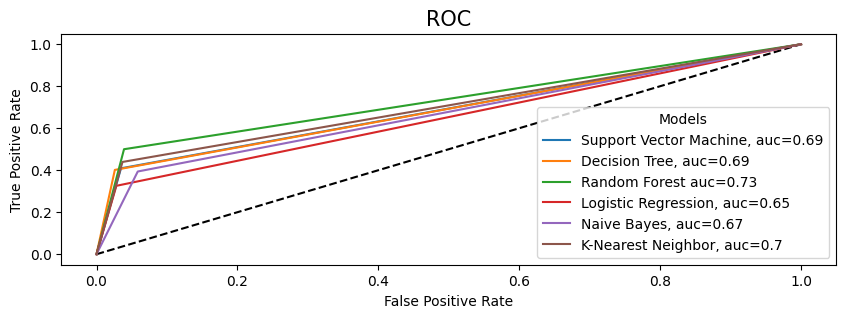

In [151]:
# display as plot
plt.figure(figsize=(10,3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fp1,tp1,label="Support Vector Machine, auc="+str(round(auc1,2)))
plt.plot(fp2,tp2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fp3,tp3,label="Random Forest auc="+str(round(auc3,2)))
plt.plot(fp4,tp4,label="Logistic Regression, auc="+str(round(auc4,2)))
plt.plot(fp5,tp5,label="Naive Bayes, auc="+str(round(auc5,2)))
plt.plot(fp6,tp6,label="K-Nearest Neighbor, auc="+str(round(auc6,2)))
plt.legend(loc=4, title='Models', facecolor='White')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(True)

```Conclusion :```  

Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. The AUC is the Area Under Curve. If the AUC is high, the model is better distinguishing between positive and negative class. The ROC curve is plotted with “True Positive Rate” or Recall (on the y-axis) against the “False Positive Rate” (on the x-axis). When the AUC is 0.5 means that the model has no discrimination capacity to distinguish between positive and negative class.

The highest AUC is obtained for the Random Forest Classifier model, with a value of 0.71. This means there is 71% chance that the model will be able to distinguish between default class and non-default class.

# VII. Final Model

Area under precision_recall_curve: 0.661144511792848


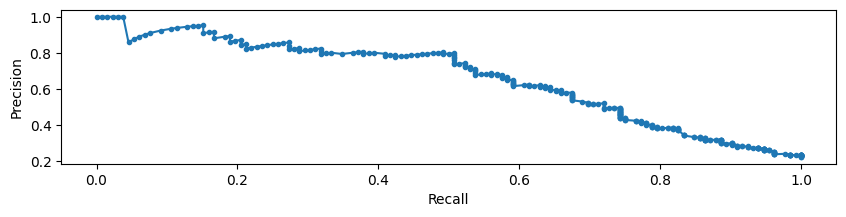

In [152]:
y_proba_rf = rf_train_test.predict_proba(x_test_final)

precision,recall,thresholds=precision_recall_curve(y_test,y_proba_rf[:,1])

plt.figure(figsize=(10,2))
plt.plot(recall, precision, marker='.');
plt.xlabel('Recall')
plt.ylabel('Precision')

print(f'Area under precision_recall_curve: {auc(recall,precision)}')

In [172]:
f1_score_rf = 2 * (precision * recall) / (precision + recall)

ix = np.argmax(f1_score_rf)
thresh=thresholds[ix]

print('Best Threshold=%f, f1_score=%.3f' % (thresholds[ix], f1_score_rf[ix]))

Best Threshold=0.205377, f1_score=0.625


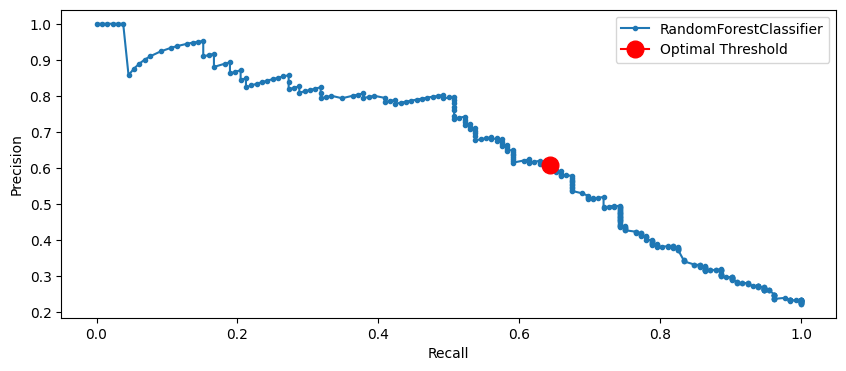

In [174]:
plt.figure(figsize=(10,4))
plt.plot(recall, precision, marker='.', label='RandomForestClassifier');
plt.plot(recall[ix],precision[ix],marker='o', markersize=12,color='red',label='Optimal Threshold');

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()

In [156]:
y_pred_rf_final = (y_proba_rf[:,1]>=thresh)
print(f'Classification report after decreasing false negative : \n\n {classification_report(y_test,y_pred_rf_final)}')

Classification report after decreasing false negative : 

               precision    recall  f1-score   support

           0       0.90      0.88      0.89       461
           1       0.61      0.64      0.62       132

    accuracy                           0.83       593
   macro avg       0.75      0.76      0.76       593
weighted avg       0.83      0.83      0.83       593



Text(8.222222222222218, 0.5, 'True Label')

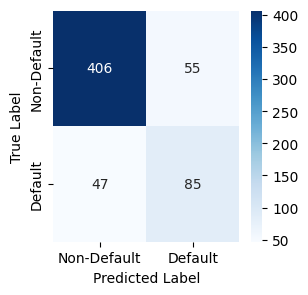

In [158]:
val=['Non-Default','Default']
cm_rf = pd.DataFrame(confusion_matrix(y_test,y_pred_rf_final),columns=val,index=val)

plt.figure(figsize=(3,3))

sns.heatmap(cm_rf,annot=True,cbar=True,cmap='Blues',fmt='g');
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

```Statement :```  
We have been successful in decreasing the false negatives (defualters predicted as non-defaulters), achieving the recall of 0.55 for positive class from its predecessor which is 0.45.

# VIII. Model Inference

In [159]:
# previous dataframe
df2.head()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,default_payment
0,0.0,0.0,0.0,0.0,0.0,0.0,130000.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,230000.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,200000.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,230000.0,0


In [160]:
# previous dataframe
df2.tail()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,default_payment
2960,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,30000.0,1
2961,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,20000.0,0
2962,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,280000.0,0
2963,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,360000.0,0
2964,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,100000.0,0


In [161]:
df2.columns.tolist()

['pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'limit_balance',
 'default_payment']

In [162]:
# generate random data
rng = np.random.default_rng(seed=np.random.randint(np.random.randint(1,100),np.random.randint(100,1000)))
pay_0 = rng.choice(df2['pay_0'].unique().tolist(), size=50)
pay_2 = rng.choice(df2['pay_2'].unique().tolist(), size=50)
pay_3 = rng.choice(df2['pay_3'].unique().tolist(), size=50)
pay_4 = rng.choice(df2['pay_4'].unique().tolist(), size=50)
pay_5 = rng.choice(df2['pay_5'].unique().tolist(), size=50)
pay_6 = rng.choice(df2['pay_6'].unique().tolist(), size=50)
limit_balance = rng.uniform(df2['limit_balance'].min(), df2['limit_balance'].max(), size=50)
default_payment = rng.choice(df2['default_payment'].unique().tolist(), size=50)

# model inference
df2_inf = pd.DataFrame({
    'pay_0' : pay_0,
    'pay_2' : pay_2,
    'pay_3' : pay_3,
    'pay_4' : pay_4,
    'pay_5' : pay_5,
    'pay_6' : pay_6,
    'limit_balance' : limit_balance,
    'default_payment' : default_payment
    })

In [163]:
df2_inf.head()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,default_payment
0,3.0,4.0,-2.0,-2.0,7.0,2.0,259446.697714,1
1,-2.0,7.0,-1.0,-1.0,4.0,0.0,721207.725948,1
2,-1.0,7.0,3.0,6.0,4.0,6.0,426709.596758,0
3,4.0,7.0,7.0,4.0,7.0,3.0,212664.155139,0
4,-2.0,6.0,-2.0,6.0,6.0,-2.0,668520.172663,1


In [164]:
df2_inf.tail()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,default_payment
45,6.0,2.0,7.0,3.0,-1.0,2.0,287185.787590,0
46,5.0,1.0,2.0,4.0,2.0,-1.0,348632.310187,0
47,4.0,3.0,4.0,4.0,-1.0,3.0,189840.665054,1
48,0.0,0.0,-2.0,8.0,-2.0,3.0,378015.823704,0
49,1.0,-2.0,2.0,0.0,7.0,3.0,455275.765956,0


In [165]:
# save data inference to csv
df2_inf.to_csv('xdata_inference_p1m1.csv', encoding='utf-8')

### Save Model

In [166]:
# Model Saving

import pickle

with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(minmax, file_1)

with open('model_svm.pkl', 'wb') as file_2:
  pickle.dump(svm_train_test, file_2)
  
with open('model_dt.pkl', 'wb') as file_3:
  pickle.dump(dt_train_test, file_3)
  
with open('model_rf.pkl', 'wb') as file_4:
  pickle.dump(rf_train_test, file_4)

with open('model_logreg.pkl', 'wb') as file_5:
  pickle.dump(logreg_train_test, file_5)
  
with open('model_gnb.pkl', 'wb') as file_6:
  pickle.dump(gnb_train_test, file_6)
  
with open('model_knn.pkl', 'wb') as file_7:
  pickle.dump(knn_train_test, file_7)

# IX. Conclusion